<img src="Walmart_logo_transparent_png.png" width="500" height="340">

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

## Business Problem:

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from scipy.stats import binom, poisson, expon, norm, geom

In [2]:
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [3]:
df=pd.read_table('walmart_data.txt', delimiter=',')

In [3]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094')

In [11]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [255]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,2,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,Single,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,324731,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,NaN,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,NaN,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,8.000000,12054.000000


In [13]:
df.groupby('Gender')['User_ID'].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

### Categorzing the Marital Status into Single and Married

In [4]:
def status(x):
    if x==1:
        return 'Married'
    else:
        return 'Single'
df['Marital_Status']=df['Marital_Status'].transform(status)

# <div align="center"> Non-Graphical Analysis </div>

### The below table consist of the distinct values and counts

In [6]:
df_distinct=df.groupby(['User_ID'])['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status'].max()
df_distinct.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_8080\3020697838.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_distinct=df.groupby(['User_ID'])['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status'].max()


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
User_ID,,,,,,
1000001,F,0-17,10,A,2,Single
1000002,M,55+,16,C,4+,Single
1000003,M,26-35,15,A,3,Single
1000004,M,46-50,7,B,2,Married
1000005,M,26-35,20,A,1,Married


In [7]:
df_distinct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5891 entries, 1000001 to 1006040
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Gender                      5891 non-null   object
 1   Age                         5891 non-null   object
 2   Occupation                  5891 non-null   int64 
 3   City_Category               5891 non-null   object
 4   Stay_In_Current_City_Years  5891 non-null   object
 5   Marital_Status              5891 non-null   object
dtypes: int64(1), object(5)
memory usage: 322.2+ KB


In [8]:
df_distinct['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

In [9]:
df_distinct['Age'].value_counts()*100/5891

26-35    34.849771
36-45    19.809879
18-25    18.146325
46-50     9.013750
51-55     8.164997
55+       6.314717
0-17      3.700560
Name: Age, dtype: float64

In [10]:
df_distinct['Occupation'].value_counts()

4     740
0     688
7     669
1     517
17    491
12    376
14    294
20    273
2     256
16    235
6     228
10    192
3     170
15    140
13    140
11    128
5     111
9      88
19     71
18     67
8      17
Name: Occupation, dtype: int64

In [11]:
df_distinct['City_Category'].value_counts()

C    3139
B    1707
A    1045
Name: City_Category, dtype: int64

In [12]:
df_distinct['Stay_In_Current_City_Years'].value_counts()

1     2086
2     1145
3      979
4+     909
0      772
Name: Stay_In_Current_City_Years, dtype: int64

In [13]:
df_distinct['Marital_Status'].value_counts()

Single     3417
Married    2474
Name: Marital_Status, dtype: int64

# <div align='center'> Visual Analysis - Univariate & Bivariate </div>

In [14]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Single,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Single,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Single,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Single,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Single,8,7969


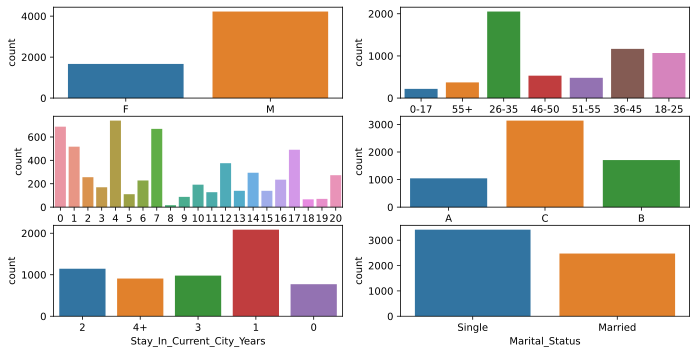

In [22]:
fig, axis =plt.subplots(nrows=3 ,ncols=2)
fig.subplots_adjust(right=1.6,top=1.2)

sns.countplot(data=df_distinct,x='Gender',ax=axis[0,0])
sns.countplot(data=df_distinct,x='Age',ax=axis[0,1])
sns.countplot(data=df_distinct,x='Occupation',ax=axis[1,0])
sns.countplot(data=df_distinct,x='City_Category',ax=axis[1,1])
sns.countplot(data=df_distinct,x='Stay_In_Current_City_Years',ax=axis[2,0])
sns.countplot(data=df_distinct,x='Marital_Status',ax=axis[2,1])
plt.show()

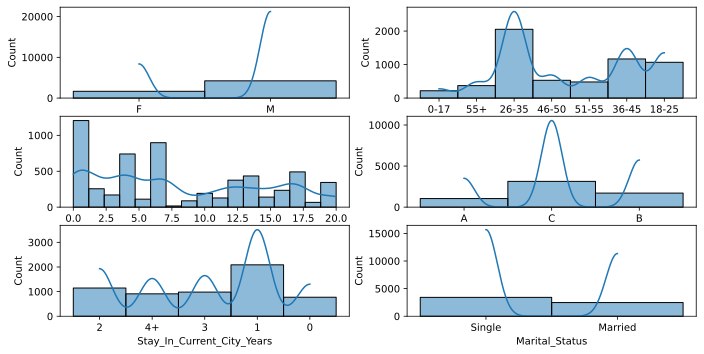

In [20]:
fig, axis =plt.subplots(nrows=3 ,ncols=2)
fig.subplots_adjust(right=1.6,top=1.2)

sns.histplot(data=df_distinct,x='Gender',kde=True,ax=axis[0,0])
sns.histplot(data=df_distinct,x='Age',kde=True,ax=axis[0,1])
sns.histplot(data=df_distinct,x='Occupation',kde=True,ax=axis[1,0])
sns.histplot(data=df_distinct,x='City_Category',kde=True,ax=axis[1,1])
sns.histplot(data=df_distinct,x='Stay_In_Current_City_Years',kde=True,ax=axis[2,0])
sns.histplot(data=df_distinct,x='Marital_Status',kde=True,ax=axis[2,1])
plt.show()

 # <div align="center"> Missing Value & Outlier Detection </div>


## Checking for null values

In [26]:
df.isnull().sum()/len(df)*100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
dtype: float64

There are no null values in the data.

## Checking for duplicates

In [27]:
df[df.duplicated()==True]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


There are no duplicates value

## Outliers

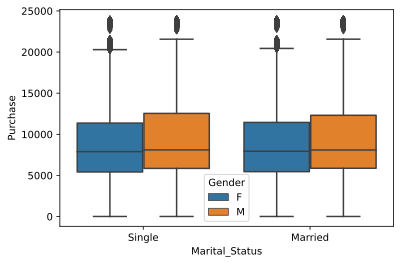

In [23]:
sns.boxplot(x='Marital_Status',y='Purchase',hue='Gender',data=df)
plt.show()

In [29]:
iqr=df['Purchase'].quantile(.75)-df['Purchase'].quantile(.25)
print('iqr =', iqr)
right=df['Purchase'].quantile(.75)+1.5*iqr
print('right value :',right)

iqr = 6231.0
right value : 21400.5


In [30]:
df[(df['Purchase']>right) & (df['Marital_Status']=='Single')]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,Single,10,23603
375,1000062,P00119342,F,36-45,3,A,1,Single,10,23792
652,1000126,P00087042,M,18-25,9,B,1,Single,10,23233
736,1000139,P00159542,F,26-35,20,C,2,Single,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,Single,10,23341
...,...,...,...,...,...,...,...,...,...,...
544015,1005759,P00200642,F,26-35,1,A,2,Single,10,23680
544417,1005811,P00117642,M,18-25,4,B,3,Single,10,23284
544488,1005815,P00116142,M,26-35,20,B,1,Single,10,23753
544704,1005847,P00085342,F,18-25,4,B,2,Single,10,23724


In [31]:
df[(df['Purchase']>right) & (df['Marital_Status']=='Married')]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
3166,1000523,P00117642,M,51-55,7,A,1,Married,10,23159
3167,1000523,P00200642,M,51-55,7,A,1,Married,10,23741
4148,1000679,P00052842,M,36-45,16,C,4+,Married,10,23384
5907,1000957,P00085342,M,36-45,1,C,2,Married,10,23650
5953,1000968,P00159542,M,51-55,12,A,4+,Married,10,23126
...,...,...,...,...,...,...,...,...,...,...
543514,1005680,P00085342,M,51-55,20,A,4+,Married,10,23682
543515,1005680,P00087042,M,51-55,20,A,4+,Married,10,23273
543823,1005736,P00052842,M,26-35,1,A,3,Married,10,23642
544743,1005852,P00202242,F,26-35,1,A,0,Married,10,23529


Differentiating data by male and Female customers

In [32]:
df_male=df[df['Gender']=='M']

In [33]:
df_male_unique=df_male.groupby(['User_ID'])['Purchase'].sum()
df_male_unique.to_frame().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 1000002 to 1006040
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Purchase  4225 non-null   int64
dtypes: int64(1)
memory usage: 66.0 KB


### Average Amount spent by individual male customer for purchasing the items.

In [34]:
a=(df_male['Purchase'].sum())
a/4225

925344.4023668639

In [35]:
df_female=df[df['Gender']=='F']

In [36]:
df_female_unique=df_female.groupby(['User_ID'])['Purchase'].sum()
df_female_unique.info()

<class 'pandas.core.series.Series'>
Int64Index: 1666 entries, 1000001 to 1006039
Series name: Purchase
Non-Null Count  Dtype
--------------  -----
1666 non-null   int64
dtypes: int64(1)
memory usage: 26.0 KB


### Average Amount spent by individual female customer for purchasing the items.

In [37]:
np.round((df_female['Purchase'].sum())/len(df_female_unique),2)

712024.39

### Average amount spent by the customer for each transaction:

In [38]:
df['Purchase'].mean()

9263.968712959126

### Average amount spent by male customer for each transaction:

In [39]:
df_male['Purchase'].mean()

9437.526040472265

### Average amount spent by female customer for each transaction:

In [40]:
df_female['Purchase'].mean()

8734.565765155476

# Conclusion:

Average amount spent by female customer for each transaction is <b>8734.57</b>
<br>Average amount spent by the customer for each transaction regardless of their gender is <b>9263.97</b>
<br>Average amount spent by male customer for each transaction is <b>9437.52</b>
<br>

<b>Male Customer spends money above the average spending and more then female customer</b>

# <div align='center'>Confidence Interval<div/>

## For male and female

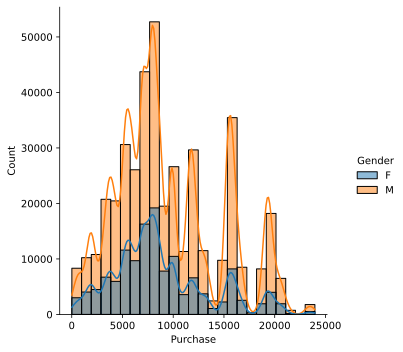

In [24]:
sns.displot(x='Purchase', hue='Gender', data=df, bins=25, kde=True)

In [25]:
for gender in df['Gender'].unique():
    if gender=='F':
        print('For Female:')
        mean_F=[]

        for i in range(1000):
            mean_F.append(df[df['Gender']==gender].sample(300)['Purchase'].mean())

        print('99% of the population expense lies between (', np.mean(mean_F)+norm.ppf(0.005)*np.std(mean_F),',',np.mean(mean_F)+norm.ppf(0.995)*np.std(mean_F),')')
        print('95% of the population expense lies between (', np.mean(mean_F)+norm.ppf(0.025)*np.std(mean_F),',',np.mean(mean_F)+norm.ppf(0.975)*np.std(mean_F),')')
        print('90% of the population expense lies between (', np.mean(mean_F)+norm.ppf(0.05)*np.std(mean_F),',',np.mean(mean_F)+norm.ppf(0.95)*np.std(mean_F),')')
        print()
        
    else:
        print('For Male:')
        mean_M=[]

        for i in range(1000):
            mean_M.append(df[df['Gender']==gender].sample(300)['Purchase'].mean())

        print('99% of the population expense lies between (', np.mean(mean_M)+norm.ppf(0.005)*np.std(mean_M),',',np.mean(mean_M)+norm.ppf(0.995)*np.std(mean_M),')')
        print('95% of the population expense lies between (', np.mean(mean_M)+norm.ppf(0.025)*np.std(mean_M),',',np.mean(mean_M)+norm.ppf(0.975)*np.std(mean_M),')')
        print('90% of the population expense lies between (', np.mean(mean_M)+norm.ppf(0.05)*np.std(mean_M),',',np.mean(mean_M)+norm.ppf(0.95)*np.std(mean_M),')')
        print()

For Female:
99% of the population expense lies between ( 8003.112152633279 , 9466.26531403339 )
95% of the population expense lies between ( 8178.027720070718 , 9291.34974659595 )
90% of the population expense lies between ( 8267.524084457214 , 9201.853382209454 )

For Male:
99% of the population expense lies between ( 8678.58977622758 , 10193.572937105751 )
95% of the population expense lies between ( 8859.701464486925 , 10012.461248846406 )
90% of the population expense lies between ( 8952.368102937553 , 9919.794610395778 )



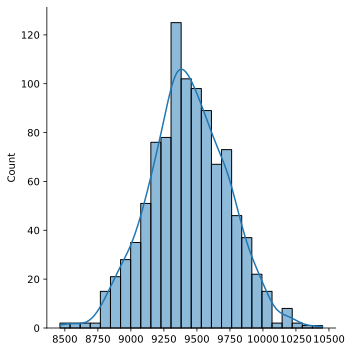

In [26]:
sns.displot(mean_M,kde=True)
plt.show()

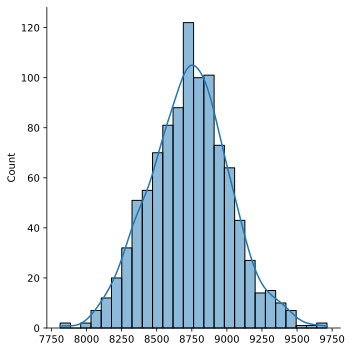

In [27]:
sns.displot(mean_F, kde=True)

Above distribution shows that it follows a Gaussian Distribution

Confidence Interval for male, female and total population are overlapping

In [28]:
male_lower_limit= np.mean(mean_M)+norm.ppf(0.025)*np.std(mean_M)
male_upper_limit=np.mean(mean_M)+norm.ppf(0.975)*np.std(mean_M)

female_lower_limit= np.mean(mean_F)+norm.ppf(0.025)*np.std(mean_F)
female_upper_limit=np.mean(mean_F)+norm.ppf(0.975)*np.std(mean_F)

print(male_lower_limit,male_upper_limit)

8859.701464486925 10012.461248846406


([<matplotlib.axis.YTick at 0x235c4ff3f70>,
 [Text(0, 0, 'male'), Text(0, 1, 'female')])

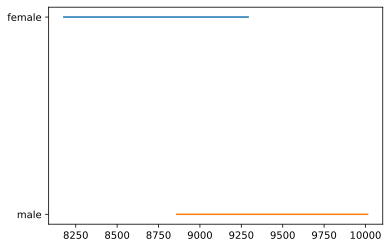

In [29]:

plt.plot((female_lower_limit,female_upper_limit),[1,1])

plt.plot((male_lower_limit,male_upper_limit),[0,0])

plt.yticks(range(2), ["male", "female"])

## For Married and Single

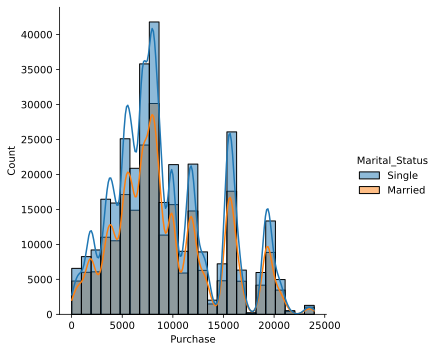

In [30]:
sns.displot(x='Purchase', hue='Marital_Status', data=df, bins=25, kde=True)

In [31]:
for status in df['Marital_Status'].unique():
    if status=='Single':
        print('For Single:')
        mean_single=[]
        for i in range(1000):
            mean_single.append(df[df['Marital_Status']=='Single'].sample(300)['Purchase'].mean())
            
        print('99% of the population expense lies between (', np.mean(mean_single)+norm.ppf(0.005)*np.std(mean_single),',',np.mean(mean_single)+norm.ppf(0.995)*np.std(mean_single),')')
        print('95% of the population expense lies between (', np.mean(mean_single)+norm.ppf(0.025)*np.std(mean_single),',',np.mean(mean_single)+norm.ppf(0.975)*np.std(mean_single),')')
        print('90% of the population expense lies between (', np.mean(mean_single)+norm.ppf(0.05)*np.std(mean_single),',',np.mean(mean_single)+norm.ppf(0.95)*np.std(mean_single),')')
        print()
    else:
        print('For Married:')
        mean_married=[]
        for i in range(1000):
            mean_married.append(df[df['Marital_Status']=='Single'].sample(300)['Purchase'].mean())
            
        print('99% of the population expense lies between (', np.mean(mean_married)+norm.ppf(0.005)*np.std(mean_married),',',np.mean(mean_married)+norm.ppf(0.995)*np.std(mean_married),')')
        print('95% of the population expense lies between (', np.mean(mean_married)+norm.ppf(0.025)*np.std(mean_married),',',np.mean(mean_married)+norm.ppf(0.975)*np.std(mean_married),')')
        print('90% of the population expense lies between (', np.mean(mean_married)+norm.ppf(0.05)*np.std(mean_married),',',np.mean(mean_married)+norm.ppf(0.95)*np.std(mean_married),')')
        print()

For Single:
99% of the population expense lies between ( 8511.329195844473 , 9995.863044155527 )
95% of the population expense lies between ( 8688.800760208203 , 9818.391479791797 )
90% of the population expense lies between ( 8779.6049123213 , 9727.5873276787 )

For Married:
99% of the population expense lies between ( 8533.08794946319 , 10018.083403870145 )
95% of the population expense lies between ( 8710.614697449746 , 9840.556655883589 )
90% of the population expense lies between ( 8801.447084520365 , 9749.72426881297 )



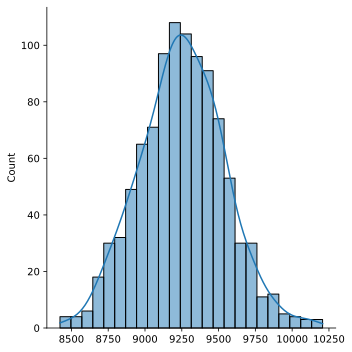

In [32]:
sns.displot(mean_single, kde=True)

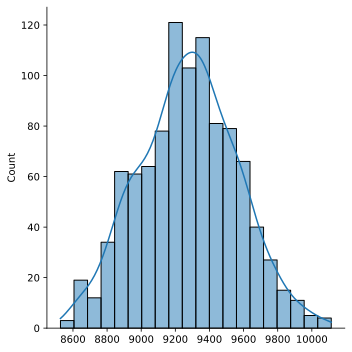

In [33]:
sns.displot(mean_married,kde=True)

Above distribution shows that it follows a Gaussian distribution


([<matplotlib.axis.YTick at 0x235c7b8a7c0>,
 [Text(0, 0, 'Single'), Text(0, 1, 'Married')])

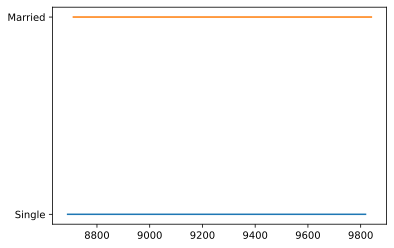

In [34]:
single_lower_limit=np.mean(mean_single)+norm.ppf(0.025)*np.std(mean_single)
single_upper_limit=np.mean(mean_single)+norm.ppf(0.975)*np.std(mean_single)

married_lower_limit=np.mean(mean_married)+norm.ppf(0.025)*np.std(mean_married)
married_upper_limit=np.mean(mean_married)+norm.ppf(0.975)*np.std(mean_married)

plt.plot((single_lower_limit,single_upper_limit),[0,0])
plt.plot((married_lower_limit,married_upper_limit),[1,1])

plt.yticks(range(2),['Single','Married'])

## For different age groups

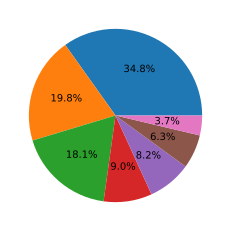

In [52]:
plt.pie(df_distinct['Age'].value_counts(), autopct='%1.1f%%')
plt.show()

For Age Group 0-17 :
99% of the population expense lies between ( 8172.040920125706 , 9677.090326540962 )
95% of the population expense lies between ( 8351.965057864363 , 9497.166188802305 )
90% of the population expense lies between ( 8444.024080562525 , 9405.107166104142 )


<Figure size 360x360 with 0 Axes>

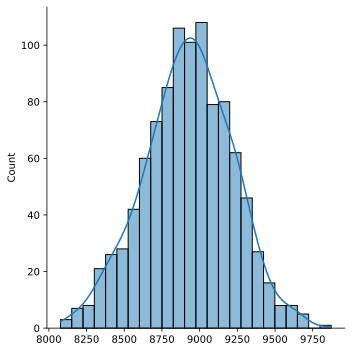


For Age Group 18-25 :
99% of the population expense lies between ( 8423.011186800402 , 9900.084659866265 )
95% of the population expense lies between ( 8599.590885702788 , 9723.504960963879 )
90% of the population expense lies between ( 8689.93871070057 , 9633.157135966097 )


<Figure size 360x360 with 0 Axes>

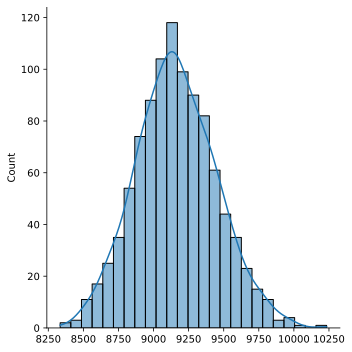


For Age Group 26-35 :
99% of the population expense lies between ( 8537.113677382647 , 9972.910109284021 )
95% of the population expense lies between ( 8708.758829945047 , 9801.264956721621 )
90% of the population expense lies between ( 8796.581871335542 , 9713.441915331125 )


<Figure size 360x360 with 0 Axes>

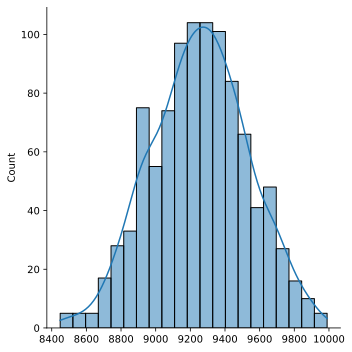


For Age Group 36-45 :
99% of the population expense lies between ( 8571.366401568526 , 10069.59772509814 )
95% of the population expense lies between ( 8750.475457968989 , 9890.488668697677 )
90% of the population expense lies between ( 8842.11744050591 , 9798.846686160756 )


<Figure size 360x360 with 0 Axes>

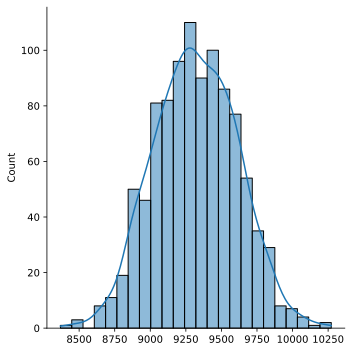


For Age Group 46-50 :
99% of the population expense lies between ( 8460.051492011728 , 9954.644207988276 )
95% of the population expense lies between ( 8638.72556380387 , 9775.970136196134 )
90% of the population expense lies between ( 8730.1449844409 , 9684.550715559102 )


<Figure size 360x360 with 0 Axes>

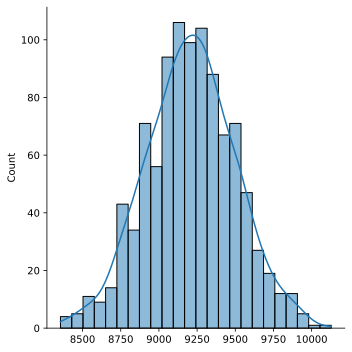


For Age Group 51-55 :
99% of the population expense lies between ( 8795.457693281223 , 10276.070013385444 )
95% of the population expense lies between ( 8972.460450721921 , 10099.067255944747 )
90% of the population expense lies between ( 9063.02473559035 , 10008.502971076317 )


<Figure size 360x360 with 0 Axes>

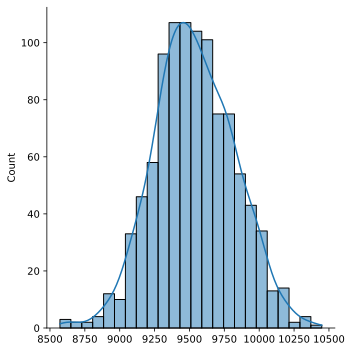


For Age Group 55+ :
99% of the population expense lies between ( 8602.810764414739 , 10075.366895585263 )
95% of the population expense lies between ( 8778.850428656517 , 9899.327231343485 )
90% of the population expense lies between ( 8868.921942406107 , 9809.255717593895 )


<Figure size 360x360 with 0 Axes>

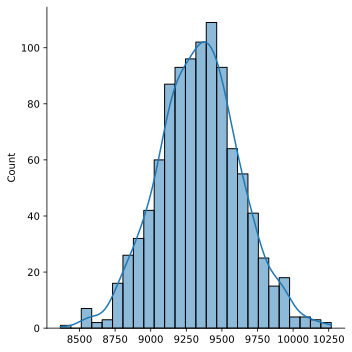

In [71]:
for age in df['Age'].sort_values().unique():
    print('For Age Group',age,':')
    meanage=[]
    for i in range(1000):
        meanage.append(df[df['Age']==age].sample(300)['Purchase'].mean())
    
    print('99% of the population expense lies between (', np.mean(meanage)+norm.ppf(0.005)*np.std(meanage),',',np.mean(meanage)+norm.ppf(0.995)*np.std(meanage),')')
    print('95% of the population expense lies between (', np.mean(meanage)+norm.ppf(0.025)*np.std(meanage),',',np.mean(meanage)+norm.ppf(0.975)*np.std(meanage),')')
    print('90% of the population expense lies between (', np.mean(meanage)+norm.ppf(0.05)*np.std(meanage),',',np.mean(meanage)+norm.ppf(0.95)*np.std(meanage),')')
    plt.figure(figsize=(5,5))
    sns.displot(meanage,kde=True)
    plt.show()
    print()   
    
    


# <center> INSIGTHS </center>

1. Male customers are more then female customers on Black Friday and male tends to spend more money.
2. Age group 26-35 spends almost 35% of the total expenditure on Back Friday.
3. City Category of type C is where the ost customer came from.
4. Customers who are staying in City from 1-2 years are more.
5. Single customers are more than married customers.
6. Average amount spent by individual male is 925344.40 and by female is 712024.39
7. Average aount spent by male per transaction is 9437.52 and by female per transaction is 8734.56

# <center> Recommendations </center>

1. Walmart should run the ad campains to attract the female customer and give more discountsso the female customer will come to store and spend more.
2. Since age group from 41 years are spending less so Online facility sould be started so thatthey can order sitting at their homes only
3. More stores should be open in City category C as it shows that more no. of customers camefrom their and stock need to be maintained.
4. Single people are spending more than married so category should me maintained whichencourage the married people to buy items

<div align='right'>Submitted by: Rajat Shrimal</div>